In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
PATH = "./2016/Week 8 Feedback (2016, incomplete) - results.csv" #week 8
PATH_2017 = "./2017/Student Feedback Surveys-Superview.csv" # 2017 data

In [2]:
# reading 2016 data week 1-7
locations = ['LA','NY','SF','SG','SV','HK', 'Taipei', 'Tokyo']
df = pd.DataFrame()
for i in range (len(locations)):
    for week in range (1,8):
        file_name = "./2016/Anon Week " + str(week) + " Feedback - " + str(locations[i]) + ".csv"
        #print(file_name)
        try:
            new_df = pd.read_csv(file_name)
            new_df["Location"] = locations[i]
            new_df['Week'] = week
            df = pd.concat([df,new_df], ignore_index=True)
        except (FileNotFoundError):
            print(file_name)
    
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('Timestamp', axis=1)




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


./2016/Anon Week 7 Feedback - SG.csv
./2016/Anon Week 1 Feedback - HK.csv
./2016/Anon Week 2 Feedback - HK.csv
./2016/Anon Week 3 Feedback - HK.csv
./2016/Anon Week 4 Feedback - HK.csv
./2016/Anon Week 7 Feedback - HK.csv
./2016/Anon Week 1 Feedback - Taipei.csv
./2016/Anon Week 2 Feedback - Taipei.csv
./2016/Anon Week 3 Feedback - Taipei.csv
./2016/Anon Week 4 Feedback - Taipei.csv
./2016/Anon Week 5 Feedback - Taipei.csv
./2016/Anon Week 1 Feedback - Tokyo.csv
./2016/Anon Week 2 Feedback - Tokyo.csv
./2016/Anon Week 3 Feedback - Tokyo.csv
./2016/Anon Week 4 Feedback - Tokyo.csv
./2016/Anon Week 5 Feedback - Tokyo.csv
./2016/Anon Week 7 Feedback - Tokyo.csv


In [3]:
df.head()

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Location,Week,What track are you in?
0,4.0,NaN,3,LA,1,NaN
1,4.0,NaN,4,LA,1,NaN
2,4.0,NaN,4,LA,1,NaN
3,4.0,NaN,4,LA,1,NaN
4,5.0,NaN,4,LA,1,NaN


In [4]:
df8 = pd.read_csv(PATH)
df8.head()

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC),Network ID
0,00b836bda84e6bdbe780af97e249e59f,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04,3212b7a834
1,39dde6dc0e1e375845d756fc7e39fc5f,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04,f4954355aa
2,5e56b9de91670b308cb98dd2848b8739,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05,3d69ca289b
3,641081d05785b47a0f17448625da0d49,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06,261608f95d
4,c29bdd4f5678d78b450f4494e0f53c8c,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11,d6672ddf6f


### Clean Confounding Pacing Data and Merge Schedule-Pacing and Tutorial-Pacing Columns

In [5]:
def clean_combine_pacing(df):
    # Drop confounding #REF! value
    df = df[df["How well is the schedule paced?"] != "#REF!"]

    # Replace NaNs with zero-values
    df["How well are the tutorials paced?"] = df["How well are the tutorials paced?"].fillna(0).astype(int)
    df["How well is the schedule paced?"] = df["How well is the schedule paced?"].fillna(0).astype(int)
    df["Overall Satisfaction"] = df["How would you rate your overall satisfaction with the Summer Academy this week?"].astype(int)
    df["Overall Satisfaction"] = df["Overall Satisfaction"] * 2
    # Merge both columns into new column "Pacing"
    df["Pacing"] = (df["How well are the tutorials paced?"] + df["How well is the schedule paced?"]) * 2
    df.drop(columns=["How well are the tutorials paced?", "How well is the schedule paced?", "How would you rate your overall satisfaction with the Summer Academy this week?"], inplace=True)
    
    return df

### NOTE: Run the cell below _once_ to clean and combine _Pacing_ data!

In [6]:
# np.nan --> int(0)
#            int(-1)
#            float(0.0)
#            str("None")
#            bool(False)

In [7]:
df = clean_combine_pacing(df)
df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

,Location,Week,What track are you in?,Overall Satisfaction,Pacing
0,LA,1,NaN,6,8
1,LA,1,NaN,8,8
2,LA,1,NaN,8,8
3,LA,1,NaN,8,8
4,LA,1,NaN,8,10


## Naming the columns to make concatination easy

In [8]:
df.rename(columns = {'What track are you in?':'Track', 'Overall Satisfaction':'Recommend'}, inplace = True)
df

,Location,Week,Track,Recommend,Pacing
0,LA,1,NaN,6,8
1,LA,1,NaN,8,8
2,LA,1,NaN,8,8
3,LA,1,NaN,8,8
4,LA,1,NaN,8,10
5,LA,1,NaN,10,8
6,LA,1,NaN,10,6
7,LA,2,NaN,8,4
8,LA,2,NaN,6,6
9,LA,2,NaN,8,8


# Reading and Cleaning Week 8

In [9]:
PATH = "./2016/Week 8 Feedback (2016, incomplete) - results.csv" #week 8
df8 = pd.read_csv(PATH)
df8

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC),Network ID
0,00b836bda84e6bdbe780af97e249e59f,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04,3212b7a834
1,39dde6dc0e1e375845d756fc7e39fc5f,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04,f4954355aa
2,5e56b9de91670b308cb98dd2848b8739,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05,3d69ca289b
3,641081d05785b47a0f17448625da0d49,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06,261608f95d
4,c29bdd4f5678d78b450f4494e0f53c8c,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11,d6672ddf6f
5,9030d8a662b39b519b2b685834413d66,10,San Francisco,summerApps,9/7/16 1:09,9/7/16 1:13,088e6f938d
6,1c07190c7caa72bf6b59cea48e1a4a97,8,San Francisco,summerApps,9/7/16 1:04,9/7/16 1:14,00f1d07a90
7,27a63d6c24710feb52c0cfdef7e01175,3,New York,summerGames,9/7/16 1:14,9/7/16 1:15,e0724aac23
8,b47b95f84547d8347119de1da5faa46d,6,Singapore,summerApps,9/7/16 1:16,9/7/16 1:21,9eeec0f9bf
9,828fafa477484f61d2ca5930fe99ad46,9,New York,summerGames,9/7/16 1:22,9/7/16 1:27,6c80fd2754


## Cleaning Up Week 8

## Modifiying the rows to make it easier to concatenate

In [10]:
# assiging the week value 
df8["Week"] = [8] * 65
# cleaning the track values
old_track_values = df8["track"].value_counts().keys().tolist()
new_track_values = ['Apps', 'Games', 'Intro', 'VR', 'Apps', 'Games']
df8 = df8.replace(old_track_values, new_track_values)

# Modifying the locations with 2 letter representation
old_location_values = df8["location"].value_counts().keys().tolist()
two_letter_location = ['SF', 'SV', 'NY', 'SG', 'LA']
df8 = df8.replace(old_location_values, two_letter_location)


In [11]:
df8.head()

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC),Network ID,Week
0,00b836bda84e6bdbe780af97e249e59f,10,NY,Apps,9/7/16 1:03,9/7/16 1:04,3212b7a834,8
1,39dde6dc0e1e375845d756fc7e39fc5f,10,SF,Intro,9/7/16 1:03,9/7/16 1:04,f4954355aa,8
2,5e56b9de91670b308cb98dd2848b8739,10,NY,Intro,9/7/16 1:03,9/7/16 1:05,3d69ca289b,8
3,641081d05785b47a0f17448625da0d49,9,SV,VR,9/7/16 1:04,9/7/16 1:06,261608f95d,8
4,c29bdd4f5678d78b450f4494e0f53c8c,3,SF,Intro,9/7/16 1:04,9/7/16 1:11,d6672ddf6f,8


## Dropping the unnecessary columns 

In [12]:
def drop_columns_week_8(df):
    df.drop(columns=["#", "Start Date (UTC)", "Submit Date (UTC)", "Network ID"], inplace=True)

In [13]:
drop_columns_week_8(df8)
df8.head()

,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Week
0,10,NY,Apps,8
1,10,SF,Intro,8
2,10,NY,Intro,8
3,9,SV,VR,8
4,3,SF,Intro,8


## Renaming the columns week 8

In [14]:
df8.rename(columns = {"track":"Track", "location":"Location", "How likely is it that you would recommend the Make School Summer Academy to a friend?":"Recommend"}, inplace = True)
df8.head()

,Recommend,Location,Track,Week
0,10,NY,Apps,8
1,10,SF,Intro,8
2,10,NY,Intro,8
3,9,SV,VR,8
4,3,SF,Intro,8


# Concatinating and resetting the index

In [38]:
# concat all data from 2016 together
final_2016 = pd.concat([df, df8], sort=True, ignore_index=True)

In [39]:
# sorting the week and location 
final_2016.sort_values(by=["Week", "Location"], inplace=True)
# resettin the indexes
final_2016.reset_index(drop=True, inplace=True)
final_2016.head()

,Location,Pacing,Recommend,Track,Week
0,LA,8.0,6,NaN,1
1,LA,8.0,8,NaN,1
2,LA,8.0,8,NaN,1
3,LA,8.0,8,NaN,1
4,LA,10.0,8,NaN,1


In [42]:
# filling the NaN value with zeros and converting all pacing to integer
final_2016["Pacing"] = final_2016["Pacing"].fillna(0).astype(int)

In [43]:
final_2016["Pacing"].unique()

array([ 8, 10,  6,  4,  2,  0])

In [49]:
final_2016.head(10)

,Location,Pacing,Recommend,Track,Week
0,LA,8,6,NaN,1
1,LA,8,8,NaN,1
2,LA,8,8,NaN,1
3,LA,8,8,NaN,1
4,LA,10,8,NaN,1
5,LA,8,10,NaN,1
6,LA,6,10,NaN,1
7,NY,10,6,Games,1
8,NY,6,6,Games,1
9,NY,6,6,Apps,1


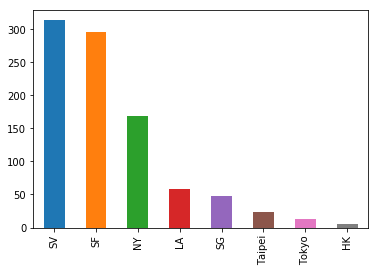

In [24]:
# Location Represention in terms of the number of submitted data 
df['Location'].value_counts().plot(kind='bar')

In [25]:
type(df['Location'].value_counts())

pandas.core.series.Series

### Calculating NPS for Final 2016 data

In [54]:
detractors = len(final_2016[(final_2016["Recommend"] <= 6) & (final_2016["Recommend"] >= 1)])
promoters = len(final_2016[final_2016["Recommend"] > 8])
total = len(final_2016["Recommend"])
print(detractors, promoters, total)

153 397 991


In [55]:
NPS =((promoters - detractors)/total)*100
print(NPS)


24.62159434914228


### NPS is  25% for 2016 final data 

In [56]:
final_2016["Recommend"].value_counts()

8     435
10    383
6     124
4      17
9      14
2       8
7       6
5       2
3       2
Name: Recommend, dtype: int64

### Pacing distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a759fd0>]],
      dtype=object)

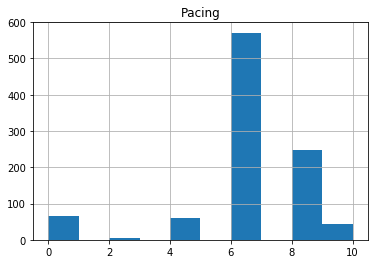

In [57]:
final_2016.hist(column="Pacing", bins=10)

In [ ]:
## Getting the Location values to use for pie chart representaion

In [63]:
final_2016["Location"].unique()

values = final_2016["Location"].value_counts().keys().tolist()
sizes = final_2016["Location"].value_counts().tolist()
print(sizes, values)

[329, 324, 181, 62, 53, 23, 13, 6] ['SV', 'SF', 'NY', 'LA', 'SG', 'Taipei', 'Tokyo', 'HK']


### Pie chart representation of location based on antandees(except 3 location showed low number of students)

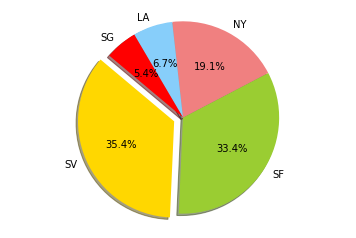

In [30]:
labels = 'SV', 'SF', 'NY', 'LA', 'SG'
sizes = [313, 295, 169, 59, 48]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()



### Looking into Overall satisfation

In [31]:
df["Recommend"].value_counts()

8     424
10    355
6     123
4      16
2       8
Name: Recommend, dtype: int64

In [32]:
((355-(123 + 16 + 8))/926)*100

22.4622030237581

In [33]:
df["Track"].value_counts(dropna=False)

Apps     395
Intro    199
Games    184
NaN      118
VR        30
Name: Track, dtype: int64

In [34]:
df.tail()

,Location,Week,Track,Recommend,Pacing
922,Tokyo,6,NaN,6,8
923,Tokyo,6,NaN,10,6
924,Tokyo,6,NaN,10,6
925,Tokyo,6,NaN,8,8
926,Tokyo,6,NaN,8,6


In [35]:
final_2016["Location"].value_counts(dropna=False)

SV        329
SF        324
NY        181
LA         62
SG         53
Taipei     23
Tokyo      13
HK          6
Name: Location, dtype: int64

In [36]:
df["Location"].value_counts(dropna=False)

SV        313
SF        295
NY        169
LA         59
SG         48
Taipei     23
Tokyo      13
HK          6
Name: Location, dtype: int64

In [37]:
df8["Location"].value_counts(dropna=False)

SF    29
SV    16
NY    12
SG     5
LA     3
Name: Location, dtype: int64

# TO-DO 
    1. Ask NPS questions for 2016 final_2016 data
        - Did percentage of promoters increase/decrease from 2016 to 2017?

In [62]:
final_2016["Location"].value_counts()

SV        329
SF        324
NY        181
LA         62
SG         53
Taipei     23
Tokyo      13
HK          6
Name: Location, dtype: int64